# Úvod do DEAP (Distributed Evolutionary Algorithms in Python)

instalace v terminálu pomocí 

conda install -c conda-forge deap 

In [1]:
import numpy as np

import random

from deap import base, creator, tools, algorithms 


#algoritmy obsahuje spoustu algoritmu pro pocitani 
#dnes budeme pouzivat jeden algoritmus s 6 parametrami

In [3]:
# teren je seznam realnych cisel mezi 0 a 1, 0.5 je hladina more
t = [1.0,0.5,0.35,0.1,0.6,0.3,0.2,0.1,0.6]
def plotterrain(t):
    fig, ax = plt.subplots()
    x = range(len(t))
    sea = [0.5 for i in range(len(t))]
    ax.fill_between(x, sea, color="turquoise")
    ax.fill_between(x, t, color="sandybrown")
    ax.axis("off")
plotterrain(t)

NameError: name 'plt' is not defined

## Vytváření nových typů
---

### Fitness
params: název, objekt fitness, -1.0 minimalizace / 1.0 maximalizace

In [ ]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))#Fitness funkce - sada hodnot, kde zkoumame jestli je hodnota platna nebo ne
#dulezitost fitness funkce je pomoci váh -1 1

c:\Users\KoplD\anaconda3\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


### Individua
params: název, třída datové struktury, fitness dle existující zaregistrované

budeme pracovat s listy (jde i numpy pole ale pozor na views!)

existuje celá řada typů: permutace, stromy, atd.

In [ ]:
creator.create("Individual", list, fitness=creator.FitnessMax)
#Jedinec se jmenuje Individual, druhej parametr muze byt cokoliv array, numpy array a pod, u nas to bude seznam
#fitness nam rika, jak budeme merit fitness funkci jmenem fitnessFunkce budeme volat tu funkci fitnes=creator.*


c:\Users\KoplD\anaconda3\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [ ]:
IND_SIZE = 10 # zde si naplnim pocet individualu
toolbox = base.Toolbox()

toolbox.register("attr_float", random.randint, 0, 1)#naplni mi toolbox 0 a 1
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_float, n=IND_SIZE)
#toolbox.register("individual", initind, IND_LEN)  # název, funkce, poporade parametry krmici funkci

In [ ]:
ind1 = toolbox.individual()
print(ind1)
ind1[1]

[1, 0, 1, 0, 0, 1, 0, 0, 0, 1]


0

In [ ]:
ind1.fitness.values


()

### Populace

In [ ]:
toolbox.register("population", tools.initRepeat, list, toolbox.individual) 
# init repeat opakuje dle parametru za ni, tedy dela list individii dle zakladni inicializace individia


In [ ]:
pop = toolbox.population(n=10)
print(pop)

[[1, 0, 0, 1, 1, 1, 0, 0, 0, 0], [1, 1, 1, 0, 1, 1, 1, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 1, 0, 0], [1, 0, 1, 1, 0, 0, 1, 1, 1, 0], [0, 1, 1, 0, 1, 1, 0, 0, 0, 1], [0, 0, 0, 0, 1, 1, 1, 0, 0, 1], [1, 1, 1, 1, 1, 1, 1, 0, 0, 1], [1, 0, 1, 1, 0, 1, 1, 0, 1, 1], [1, 1, 0, 1, 0, 0, 0, 1, 0, 1], [0, 0, 1, 0, 0, 1, 0, 0, 0, 1]]


## Fitness
---
Tuto funkci si musíme napsat sami !!!

In [ ]:
def evaluate(individual):
    return sum(individual),    # !!!! vracíme n-tici, proto ta čárka

In [ ]:
toolbox.register("evaluate", evaluate)

## Operátory
---

sada operátorů lze nalézt v [dokumentaci](https://deap.readthedocs.io/en/master/api/tools.html#module-deap.tools)

In [ ]:
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutUniformInt, low=0, up=1, indpb=0.05)#pravdepodobnost jestli zmutuji jednotlivy bit
toolbox.register("select", tools.selTournament, tournsize=3)

## Jednoduchý algoritmus
---

In [ ]:
# hlavní parametry vystrčené kvůli experimentování

NGEN = 50            # počet generací
CXPB = 0.7           # pravděpodobnost crossoveru na páru
MUTPB = 0.2         # pravděpodobnost mutace jedince

finalpop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN)


gen	nevals
0  	10    
1  	8     
2  	5     
3  	4     
4  	9     
5  	6     
6  	8     
7  	6     
8  	10    
9  	10    
10 	6     
11 	8     
12 	7     
13 	10    
14 	6     
15 	6     
16 	8     
17 	3     
18 	6     
19 	6     
20 	4     
21 	5     
22 	10    
23 	6     
24 	7     
25 	8     
26 	8     
27 	8     
28 	10    
29 	7     
30 	8     
31 	8     
32 	9     
33 	10    
34 	7     
35 	8     
36 	6     
37 	7     
38 	7     
39 	10    
40 	9     
41 	7     
42 	10    
43 	7     
44 	7     
45 	10    
46 	8     
47 	7     
48 	8     
49 	7     
50 	8     


## Statistika
---

In [ ]:
import numpy as np

s = tools.Statistics(key=lambda ind: ind.fitness.values)
s.register("mean", np.mean)
s.register("max", np.max)


hof = tools.HallOfFame(1)  # pamatuje si 1 nejlepšího jedince za historii evoluce (i když zanikne)

pop = toolbox.population(n=10)


finalpop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN, stats=s, halloffame=hof)

gen	nevals	mean	max
0  	10    	5.2 	7  
1  	10    	6.5 	8  
2  	6     	7.9 	8  
3  	8     	8   	9  
4  	5     	8.4 	9  
5  	8     	8.6 	9  
6  	9     	9   	9  
7  	8     	8.9 	9  
8  	10    	9   	9  
9  	8     	9   	9  
10 	10    	8.9 	9  
11 	4     	9   	9  
12 	8     	8.9 	9  
13 	3     	9   	9  
14 	5     	8.9 	9  
15 	5     	9   	9  
16 	8     	9   	9  
17 	3     	8.9 	9  
18 	10    	9   	9  
19 	8     	9   	9  
20 	9     	8.9 	9  
21 	9     	9.1 	10 
22 	4     	9.2 	10 
23 	5     	9.8 	10 
24 	6     	10  	10 
25 	10    	10  	10 
26 	3     	10  	10 
27 	6     	10  	10 
28 	10    	9.9 	10 
29 	8     	9.9 	10 
30 	8     	10  	10 
31 	8     	10  	10 
32 	4     	10  	10 
33 	7     	10  	10 
34 	7     	9.9 	10 
35 	4     	10  	10 
36 	10    	9.9 	10 
37 	9     	9.9 	10 
38 	2     	10  	10 
39 	10    	10  	10 
40 	10    	10  	10 
41 	9     	10  	10 
42 	9     	10  	10 
43 	10    	9.8 	10 
44 	6     	9.9 	10 
45 	7     	10  	10 
46 	7     	10  	10 
47 	8     	10  	10 
48 	8     	10  	10 


In [ ]:
mean, maximum = logbook.select("mean", "max")


print(hof)

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


## Kreslení statistiky
---

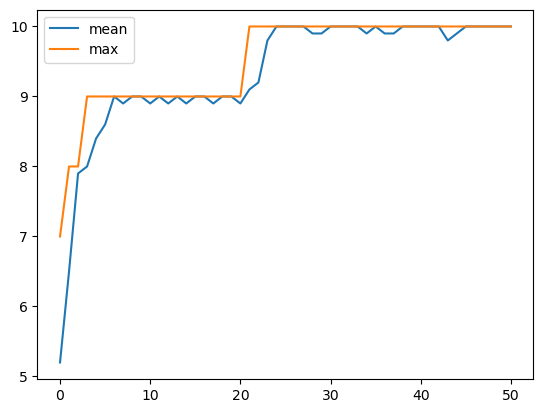

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(range(NGEN+1), mean, label="mean")     # 0.tá generace zvlášť
ax.plot(range(NGEN+1), maximum, label="max")

ax.legend()

## Aplikace na barvení grafu
---

### Načtení dat

In [ ]:
import numpy as np
import networkx as nx



# funkce pro nacitani grafu z Dimacs formatu
def readdimacs(filename):

    file = open(filename, 'r')
    lines = file.readlines()
    
    Gd = nx.Graph()

    for line in lines:
        if line[0] == "e":
            vs = [int(s) for s in line.split() if s.isdigit()]
            Gd.add_edge(vs[0]-1, vs[1]-1)   # dimacs cisluje vrcholy od 1
    return Gd

Gd = nx.Graph()
Gd = readdimacs('DSJC125.1.txt') 

FileNotFoundError: [Errno 2] No such file or directory: 'DSJC125.1.txt'

### Definice GA

In [ ]:

COLNUM = 10 # počet barev

N = Gd.number_of_nodes()

creator.create("FitnessMax", base.Fitness, weights=(-1.0,))  # minimalizujeme počet kolizí

creator.create("Individual", list, fitness=creator.FitnessMax)


toolbox = base.Toolbox()

toolbox.register("attr_float", random.randint, 0, COLNUM)
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_float, n=N)


toolbox.register("population", tools.initRepeat, list, toolbox.individual) 



# vrací celkový počet kolizí, zde bude kod terenu
def evaluate(individual):
    
    collisions = 0
    
    for i in range(N-1):
        for j in range(i, N):
            if Gd.has_edge(i, j):
                if individual[i] == individual[j]:
                    collisions += 1
    return collisions, # !!!! vracíme n-tici, proto ta čárka
   

toolbox.register("evaluate", evaluate)


toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutUniformInt, low=0, up=COLNUM, indpb=0.01)
toolbox.register("select", tools.selTournament, tournsize=2)



NGEN = 150          # počet generací
CXPB = 0.5           # pravděpodobnost crossoveru na páru
MUTPB = 0.7         # pravděpodobnost mutace



s = tools.Statistics(key=lambda ind: ind.fitness.values)
s.register("mean", np.mean)
s.register("min", np.min)

pop = toolbox.population(n=100)


finalpop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN, stats=s)

### Vykreslení fitness

In [ ]:
mean, minimum = logbook.select("mean", "min")

fig, ax = plt.subplots()

ax.plot(range(NGEN+1), mean, label="mean")     # 0.tá generace zvlášť
ax.plot(range(NGEN+1), minimum, label="min")
ax.legend()